#Likelihood of Social Media Presence by Region of Farmers' Market

### Have you ever wondered which part of the U.S. leverages Social Media for local farmers' market sales more or less? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

%matplotlib inline

import statsmodels.api as sm

In [2]:
#import the file and check the first and last rows

markets = pd.read_csv("../GA-DAT-LA-07-Project/Export-5.csv")
markets.head()

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1000618,100-Mile Market,http://www.peoplesfoodco-op.org/,NaN,NaN,NaN,NaN,507 Harrison Street,Kalamazoo,Kalamazoo,...,Y,N,Y,N,N,Y,N,N,Y,4/24/2014 18:22
1,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
2,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,10/28/2014 9:49
3,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,N,3/1/2012 10:38
4,1011100,12 South Farmers Market,http://www.12southfarmersmarket.com,12_South_Farmers_Market,@12southfrmsmkt,NaN,@12southfrmsmkt,3000 Granny White Pike,Nashville,Davidson,...,Y,N,Y,N,Y,Y,Y,N,N,5/1/2015 10:40


In [3]:
# What data do I have to analyze?

markets.columns

Index(['FMID', 'MarketName', 'Website', 'Facebook', 'Twitter', 'Youtube',
       'OtherMedia', 'street', 'city', 'County', 'State', 'zip', 'region',
       'Season1Date', 'Season1Time', 'Season2Date', 'Season2Time',
       'Season3Date', 'Season3Time', 'Season4Date', 'Season4Time', 'x', 'y',
       'Location', 'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic',
       'Bakedgoods', 'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs',
       'Vegetables', 'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts',
       'Plants', 'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee',
       'Beans', 'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu',
       'WildHarvested', 'updateTime'],
      dtype='object')

In [4]:
# Social Media Usage analysis

CountMissingWeb = markets['Website'].isnull().sum()
CountMissingWeb

3554

In [5]:
CountMissingFB = markets['Facebook'].isnull().sum()
CountMissingFB

5224

In [6]:
CountMissingTw = markets['Twitter'].isnull().sum()
CountMissingTw

7673

In [7]:
CountMissingYT = markets['Youtube'].isnull().sum()
CountMissingYT

8360

Facebook
 www.facebook.com/pages/Haddon-Heights-Farmers-Market/219172298144851    1
//www.facebook.com/BrattleboroWinterFarmersMarket                        1
//www.facebook.com/ShirleysFarmersMarketsNV                              1
/farmersmarketatlincolnpark                                              1
12_South_Farmers_Market                                                  1
@locustgrovefarmersmarket                                                1
Adairsville Farmers Market                                               1
Adams County Farm Fresh Markets                                          2
Albert Lea Farmers Market                                                1
Ames Main Street Farmers' Market                                         1
Atlantic Highlands Farmers Market                                        1
Aurora Local Farmers Market                                              1
Austintown Farmers Market                                                1
Ballard Farmers 

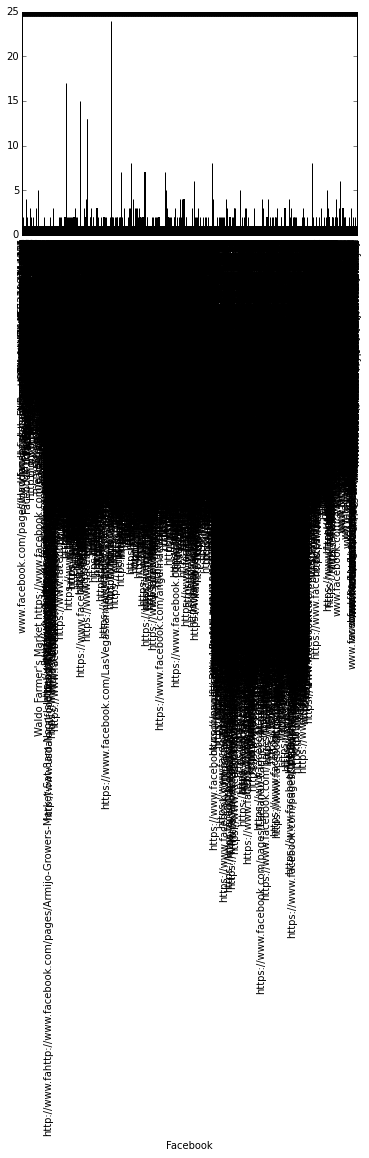

In [8]:
# Should bar graph of farmers' market by state, county, and year that have social media presense


#Start with FB... Need to figure out how to just take the presence thereof as a Y value.

CountbyFB = markets.groupby(markets['Facebook'])['FMID'].count()
print(CountbyFB)
CountbyFB.plot(kind='bar')